# Import

In [680]:
import pandas as pd

In [681]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

font_path = "C:/Windows/Fonts/malgun.ttf"

# Load Data

In [682]:
train_df = pd.read_csv("../../data/train.csv")
test_df = pd.read_csv("../../data/test.csv")  
submission = pd.read_csv("../../data/sample_submission.csv")  

In [683]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54609 non-null  object
 1   분류      54609 non-null  object
 2   제목      54609 non-null  object
 3   키워드     54609 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [684]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   제목      23405 non-null  object
 2   키워드     23405 non-null  object
dtypes: object(3)
memory usage: 548.7+ KB


In [685]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   분류      23405 non-null  object
dtypes: object(2)
memory usage: 365.8+ KB


In [686]:
len(train_df['분류'].value_counts())

56

타겟변수 -> '분류'이고 종류 56가지

In [687]:
test_df.head()

,ID,제목,키워드
0,TEST_00000,[부고] 김태수씨 별세 외,"김태수,별세,김태수씨,서울,광남초등학,교장,별세,김윤정,이노코리아,대표,희정,한성대..."
1,TEST_00001,"신규 확진 나흘째 세자릿수... 방역당국, 핼러윈 풍선효과 차단 총력","신규,확진,나흘,세자릿수,방역당국,핼러윈,풍선,효과,차단,총력,감염증,신종,코로나바..."
2,TEST_00002,"[서경이 만난 사람] 전해철 장관 ""재정분권 강화 '지방자치 2.0 시대' 마중물 ...","전해철,장관,재정,분권,강화,지방자치,2.0,시대,마중물,마련,장관,전해철,행정안전..."
3,TEST_00003,"용인시, 12일 '장애인 구인 구직 만남의 날' 채용 행사","용인시,구인,장애인,구직,만남,채용,행사,노호근,용인특례시,장애인,취업,지원,대회의..."
4,TEST_00004,지자체 벽 터 경기지역 산단 활성화 모색,"지자체,경기,북동부,지역,산업단지,혁신단위,설정,전략,지역,연계,특성,제시,경기도경..."


영어 번역 내용 제거

In [688]:
# '키워드' 열에서 '기사'와 '구글' 두 단어를 모두 포함하는 행을 찾는 조건
condition = train_df['키워드'].apply(lambda x: all(word in x for word in ['기사', '구글']))

# 조건을 만족하는 행들로 새로운 데이터프레임 생성
filtered_df = train_df[condition].copy()

In [689]:
filtered_df.iloc[0]['제목']

'이상일 용인특례시장, 민주평통 경기지역 의장표창 수여식 참석'

In [690]:
filtered_df.iloc[0]['키워드']

'이상일,용인,특례,시장,참석,민주평통,경기,지역,의장,표창,수여식,시장,민주평통,평화,수호,선도,활동,감사,강조,이상일,용인,특례,시장,에이스홀,시청,민주평화통일자문회,수여식,경기,지역,의장,표창,참석,관계자들,격려,자리,시장,홍승표,민주평통,경기,지역,회의,부의장,용인시협의회장,추상구,민주평통,용인시,협의회장,자문위원,민주평통,경기,지역,자문,위원,400여명,참석,시장,민주평화통일자문회,경기지역회의,안보태세,수호,한반도,평화,선도,활동,감사,시장,북한,도발,주시,차례,특강,정세,한반도,안보,강화,강조,내년,민주평통,활동,응원,차원,지원,수여식,이날,표창,임명숙,자문위원,장석순,용인시협의회,자문,위원,자치분권,정지혜,용인시,자치,분권,민간협력팀장,62명,유공자,의장,표창,용인시협의회,평화통일포럼,통일공감사업,진행,홍보,평화,통일,정책,노력,유공,기관,표창,대표,이소연,뉴코리아여성연합,통일,페이스,주제,특강,진행,기사,구글,번역,번역,영문,기사,전문,구글번역,이해도,노력,영문,번역,오류,전제,following,full,text,English,article,translated,Google,Translate,Google,Translate,hard,Mayor,Lee,emphasized,grateful,Break,News,Southern,Gyeonggi,Yongin,Reporter,Lee,Gwi-seon,Yongin,Special,Mayor,Lee,Sang-il,attended,Gyeonggi,Region,Chairman,Award,Award,Ceremony,Democratic,Peaceful,Unification,Advisory,Council,held,City,Hall,Ace,Hall,20t,encouraged,people,attended,event,including,Mayor,Lee,Hong,Seung-pyo,vice-chairman,Gyeonggi,Regional,Council,Democratic,People,Unification,Party,Sang-gu,Cho

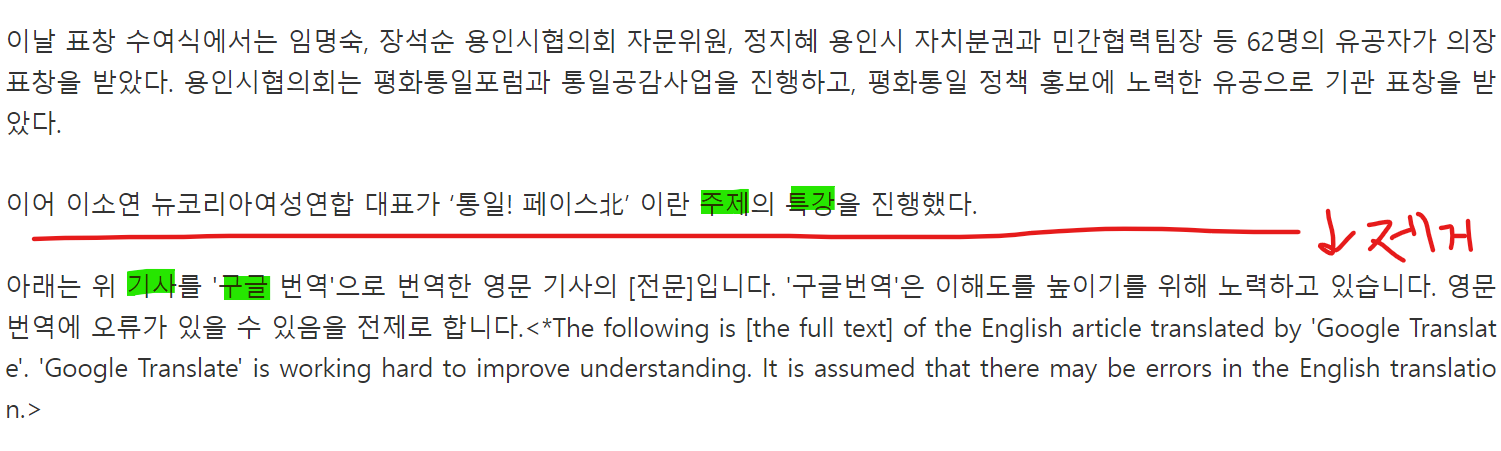

In [691]:
# '기사, 구글' 순서로 단어가 나오는 부분을 찾아 삭제하는 함수 정의
def remove_keywords(text):
    keywords = ['기사', '구글']
    start_index = 0
    for keyword in keywords:
        start_index = text.find(keyword, start_index)
        if start_index == -1:
            return text
        start_index += len(keyword)
    return text[:text.find('기사')].strip()

# 각 행의 '키워드' 값에서 '기사' 단어부터 마지막 단어까지 삭제
filtered_df['키워드'] = filtered_df['키워드'].apply(remove_keywords)

In [692]:
filtered_df.iloc[0]['키워드']

'이상일,용인,특례,시장,참석,민주평통,경기,지역,의장,표창,수여식,시장,민주평통,평화,수호,선도,활동,감사,강조,이상일,용인,특례,시장,에이스홀,시청,민주평화통일자문회,수여식,경기,지역,의장,표창,참석,관계자들,격려,자리,시장,홍승표,민주평통,경기,지역,회의,부의장,용인시협의회장,추상구,민주평통,용인시,협의회장,자문위원,민주평통,경기,지역,자문,위원,400여명,참석,시장,민주평화통일자문회,경기지역회의,안보태세,수호,한반도,평화,선도,활동,감사,시장,북한,도발,주시,차례,특강,정세,한반도,안보,강화,강조,내년,민주평통,활동,응원,차원,지원,수여식,이날,표창,임명숙,자문위원,장석순,용인시협의회,자문,위원,자치분권,정지혜,용인시,자치,분권,민간협력팀장,62명,유공자,의장,표창,용인시협의회,평화통일포럼,통일공감사업,진행,홍보,평화,통일,정책,노력,유공,기관,표창,대표,이소연,뉴코리아여성연합,통일,페이스,주제,특강,진행,'

In [693]:
len(filtered_df['분류'].value_counts())

47

In [694]:
filtered_df['분류'].value_counts()

지역               1594
IT_과학:인터넷_SNS      59
사회:장애인             38
사회:사회일반            36
사회:교육_시험           35
경제:취업_창업           34
경제:반도체             34
문화:전시_공연           30
경제:부동산             24
스포츠:올림픽_아시안게임      22
정치:행정_자치           22
경제:경제일반            21
IT_과학:콘텐츠          20
사회:의료_건강           20
사회:여성              18
경제:자동차             18
정치:국회_정당           18
경제:무역              17
사회:환경              16
정치:정치일반            15
문화:문화일반            14
경제:유통              13
IT_과학:모바일          12
경제:금융_재테크          11
문화:출판              11
문화:학술_문화재          10
경제:서비스_쇼핑          10
문화:방송_연예            9
문화:미술_건축            9
스포츠:축구              9
정치:선거               7
문화:음악               5
사회:노동_복지            5
정치:청와대              4
IT_과학:보안            4
IT_과학:IT_과학일반       4
스포츠:월드컵             3
사회:사건_사고            3
국제                  3
경제:자원               3
문화:종교               2
정치:북한               2
IT_과학:과학            1
사회:미디어              1
문화:요리_여행            1
경제:산업_기업  

실제 제거하여 데이터셋에 반영

In [695]:
# '키워드' 열에서 '기사'와 '구글' 두 단어를 모두 포함하는 행을 찾는 조건
condition_train = train_df['키워드'].apply(lambda x: all(word in x for word in ['기사', '구글']))
condition_test = test_df['키워드'].apply(lambda x: all(word in x for word in ['기사', '구글']))

# 조건을 만족하는 행들로 새로운 데이터프레임 생성
filtered_train_df = train_df[condition_train].copy()
filtered_test_df = test_df[condition_test].copy()

# '기사, 구글' 순서로 단어가 나오는 부분을 찾아 삭제하는 함수 정의
def remove_keywords(text):
    keywords = ['기사', '구글']
    start_index = 0
    for keyword in keywords:
        start_index = text.find(keyword, start_index)
        if start_index == -1:
            return text
        start_index += len(keyword)
    return text[:text.find('기사')].strip()

# 각 행의 '키워드' 값에서 '기사' 단어부터 마지막 단어까지 삭제
filtered_train_df['키워드'] = filtered_train_df['키워드'].apply(remove_keywords)
filtered_test_df['키워드'] = filtered_test_df['키워드'].apply(remove_keywords)

# 수정된 '키워드' 값을 원래 데이터프레임에 반영
train_df.loc[condition_train, '키워드'] = filtered_train_df['키워드']
test_df.loc[condition_test, '키워드'] = filtered_test_df['키워드']

In [696]:
filtered_df.iloc[0]['키워드']

'이상일,용인,특례,시장,참석,민주평통,경기,지역,의장,표창,수여식,시장,민주평통,평화,수호,선도,활동,감사,강조,이상일,용인,특례,시장,에이스홀,시청,민주평화통일자문회,수여식,경기,지역,의장,표창,참석,관계자들,격려,자리,시장,홍승표,민주평통,경기,지역,회의,부의장,용인시협의회장,추상구,민주평통,용인시,협의회장,자문위원,민주평통,경기,지역,자문,위원,400여명,참석,시장,민주평화통일자문회,경기지역회의,안보태세,수호,한반도,평화,선도,활동,감사,시장,북한,도발,주시,차례,특강,정세,한반도,안보,강화,강조,내년,민주평통,활동,응원,차원,지원,수여식,이날,표창,임명숙,자문위원,장석순,용인시협의회,자문,위원,자치분권,정지혜,용인시,자치,분권,민간협력팀장,62명,유공자,의장,표창,용인시협의회,평화통일포럼,통일공감사업,진행,홍보,평화,통일,정책,노력,유공,기관,표창,대표,이소연,뉴코리아여성연합,통일,페이스,주제,특강,진행,'

In [697]:
# # 수정된 '키워드' 값을 원래 데이터프레임에 반영
# train_df.loc[condition_train, '키워드'] = filtered_train_df['키워드']
# test_df.loc[condition_test, '키워드'] = filtered_test_df['키워드']

# # 수정된 데이터프레임을 CSV 파일로 저장
# train_df.to_csv('train_df_translate_del.csv', index=False, encoding='utf-8-sig')
# test_df.to_csv('test_df_translate_del.csv', index=False, encoding='utf-8-sig')

## 전처리

In [698]:
# import re
# from collections import Counter

# # 불용어 제거
# removed_keywords = []

# def remove_invalid_keywords(keywords):
#     pattern = re.compile(
#         r'[A-Za-z]+[가-힣\u4E00-\u9FFF]+|'  # 영어+한글
#         r'[0-9]+[가-힣\u4E00-\u9FFF]+|'     # 숫자+한글
#         r'[0-9]+[A-Za-z]+|'                 # 숫자+영어
#         r'[가-힣]+[A-Za-z\u4E00-\u9FFF]+|'  # 한글+영어
#         r'[가-힣]+[0-9]+|'                  # 한글+숫자
#         r'[A-Za-z]+[0-9]+|'                 # 영어+숫자
#         r'[\u4E00-\u9FFF]+|'                # 한자
#         r'[0-9]+(\.[0-9]+)?%|'              # 숫자+퍼센트
#         r'[0-9]+|'                          # 숫자
#         r'[A-Za-z]+'                        # 영어
#     )
#     valid_keywords = []
#     exceptions = ['코로나19', 'QR코드', 'RE100', 'AI', 'SNS', 'R&D', 'CCTV', 'TV', 'VR', 'SW']
#     for word in keywords.split(','):
#         word = word.strip()
#         if not word or pattern.match(word):  # 공백이거나 패턴에 맞는 단어 제거
#             if word not in exceptions:  # 예외 처리
#                 removed_keywords.append(word)
#             else:
#                 valid_keywords.append(word)
#         else:
#             valid_keywords.append(word)
#     return ', '.join(valid_keywords)

# # 원본 데이터에서 해당 키워드들을 제거
# train_df['키워드'] = train_df['키워드'].apply(remove_invalid_keywords)
# test_df['키워드'] = test_df['키워드'].apply(remove_invalid_keywords)

# # 제거된 단어들 출력
# print("\n제거된 단어들:")
# print(removed_keywords[:10])

영어 빼고 돌리기

In [699]:
import re
from collections import Counter

# 불용어 제거
removed_keywords = []

def remove_invalid_keywords(keywords):
    pattern = re.compile(
        r'[A-Za-z]+[가-힣\u4E00-\u9FFF]+|'  # 영어+한글
        r'[0-9]+[가-힣\u4E00-\u9FFF]+|'     # 숫자+한글
        r'[0-9]+[A-Za-z]+|'                 # 숫자+영어
        r'[가-힣]+[A-Za-z\u4E00-\u9FFF]+|'  # 한글+영어
        r'[가-힣]+[0-9]+|'                  # 한글+숫자
        r'[A-Za-z]+[0-9]+|'                 # 영어+숫자
        r'[\u4E00-\u9FFF]+|'                # 한자
        r'[0-9]+(\.[0-9]+)?%|'              # 숫자+퍼센트
        r'[0-9]+'                          # 숫자
        # r'[A-Za-z]+'                        # 영어
    )
    valid_keywords = []
    exceptions = ['코로나19', 'QR코드', 'RE100', 'AI', 'SNS', 'R&D', 'CCTV', 'TV', 'VR', 'SW', 'ESG', 'QR']
    for word in keywords.split(','):
        word = word.strip()
        if not word or pattern.match(word):  # 공백이거나 패턴에 맞는 단어 제거
            if word not in exceptions:  # 예외 처리
                removed_keywords.append(word)
            else:
                valid_keywords.append(word)
        else:
            valid_keywords.append(word)
    return ', '.join(valid_keywords)

# 원본 데이터에서 해당 키워드들을 제거
train_df['키워드'] = train_df['키워드'].apply(remove_invalid_keywords)
test_df['키워드'] = test_df['키워드'].apply(remove_invalid_keywords)

# 제거된 단어들 출력
print("\n제거된 단어들:")
print(removed_keywords[:10])


제거된 단어들:
['18일', '15일', '7월', '8월', '50%', '22일', '20명', '10명', '70명', '36종류']


In [700]:
# 제거된 단어들의 빈도 계산 및 상위 50개 출력
keyword_counter = Counter(removed_keywords)
top_50_keywords = keyword_counter.most_common(50)

print("\n제거된 단어들 상위 50개:")
for keyword, count in top_50_keywords:
    print(f"{keyword}: {count}")


제거된 단어들 상위 50개:
A씨: 13186
: 7207
1만: 6451
SK하이닉스: 5605
1년: 4812
3년: 4033
2년: 3948
B씨: 3770
6월: 3513
1명: 3455
12월: 3436
7월: 3407
3일: 3389
3월: 3347
1억: 3274
1천: 3178
2만: 3122
9월: 3099
4월: 3056
2명: 3024
3만: 2953
10월: 2874
5월: 2849
8월: 2814
1: 2791
3명: 2749
5년: 2740
7일: 2740
22일: 2734
23일: 2725
27일: 2708
8일: 2693
14일: 2684
11월: 2684
30일: 2668
28일: 2663
13일: 2641
15일: 2606
20일: 2600
1일: 2590
26일: 2579
18일: 2577
3개: 2561
4일: 2510
5일: 2507
17일: 2503
12일: 2501
25일: 2478
19일: 2464
10일: 2415


영어부분만 처리

영어단어중 2가지 경우 고려  
- 특정 단어만 지울지(http, www, 갯수10개 이하제거 등등..)  
- (밑에방식) 다 지우고 예외처리할지  

In [701]:
import re
from collections import Counter

# 불용어 제거
removed_keywords = []

def remove_invalid_keywords(keywords):
    pattern = re.compile(
        r'[A-Za-z]+'                        # 영어
    )
    valid_keywords = []
    exceptions = ['코로나19', 'QR코드', 'RE100', 'AI', 'SNS', 'R&D', 'CCTV', 'TV', 'VR', 'SW', 'ESG', 'QR']
    for word in keywords.split(','):
        word = word.strip()
        if not word or pattern.match(word):  # 공백이거나 패턴에 맞는 단어 제거
            if word not in exceptions:  # 예외 처리
                removed_keywords.append(word)
            else:
                valid_keywords.append(word)
        else:
            valid_keywords.append(word)
    return ', '.join(valid_keywords)

# 원본 데이터에서 해당 키워드들을 제거
train_df['키워드'] = train_df['키워드'].apply(remove_invalid_keywords)
test_df['키워드'] = test_df['키워드'].apply(remove_invalid_keywords)

# 제거된 단어들 출력
print("\n제거된 단어들:")
print(removed_keywords[:10])


제거된 단어들:
['CJ', 'ATM', 'ARS', 'www.wetax.go.kr', 'LH', 'LH', 'LH', 'BIT', 'BIS', 'NH']


이때 회사나 기타 영어 관련 단어에 대한 고려필요    
- 회사명 : SK하이닉스, LG전자, GS건설, 삼성SDI 등등     
- 기타 : ESG, GTX(GTX-A,GTX용인역등), GX룸, KLPGA 등등  

In [702]:
# 제거된 단어들의 빈도 계산 및 상위 50개 출력
keyword_counter = Counter(removed_keywords)
top_50_keywords = keyword_counter.most_common(50)

print("\n제거된 단어들 상위 50개:")
for keyword, count in top_50_keywords:
    print(f"{keyword}: {count}")


제거된 단어들 상위 50개:
SK: 4704
GTX: 4231
LH: 4175
IC: 2620
GH: 2347
TF: 2005
KLPGA: 1989
GTX-A: 1501
SRT: 1399
NH: 1343
YTN: 1227
CJ: 943
MOU: 885
LED: 883
ICT: 826
KCC: 815
CES: 803
Fab: 754
CC: 735
LG: 729
KG: 716
TSMC: 652
LAB: 630
KB: 613
KTX: 560
City: 543
CEO: 525
UNIST: 520
SUV: 514
LPG: 512
MWC: 509
FC: 495
MBC: 494
SOC: 477
PC: 468
https: 460
PF: 452
DS: 437
GS: 437
IoT: 403
PCR: 375
www.dnews.co.kr: 364
EBN: 361
AMG: 356
KBS: 338
GTX-C: 336
EV: 336
ATM: 328
DRT: 327
PM: 322


단독으로 조사만 존재하는 경우는 x

In [703]:
import re
from collections import Counter

# 불용어 제거
removed_keywords = []

def remove_invalid_keywords(keywords):
    pattern = re.compile(
        r'^(이|가|을|를|은|는|와|과|으로|로|에|에서|에게)$'  # 단독으로 존재하는 조사
    )
    valid_keywords = []
    for word in keywords.split(','):
        word = word.strip()
        if not word or pattern.match(word):  # 공백이거나 패턴에 맞는 단어 제거
            removed_keywords.append(word)
        else:
            valid_keywords.append(word)
    return ', '.join(valid_keywords)

# 원본 데이터에서 해당 키워드들을 제거
train_df['키워드'] = train_df['키워드'].apply(remove_invalid_keywords)
test_df['키워드'] = test_df['키워드'].apply(remove_invalid_keywords)

# 제거된 단어들 출력
print("\n제거된 단어들:")
print(removed_keywords[:10])


제거된 단어들:
['가', '가']


'경기용인 -> 경기용, [전문] -> 전문' 이렇게 들어간 값이 있어서 제거

행의 갯수를 출력함

In [704]:
# 정확히 '경기용' 단어를 포함하고 있는 행 필터링 / 경기용인플랫폼 이런 단어는 찾지 않음
filtered_df = train_df[train_df['키워드'].str.contains(r'\b경기용\b', na=False)]

# 결과 출력
len(filtered_df)

570

In [705]:
# 정확히 '전문' 단어를 포함하고 있는 행 필터링 / 전문용 이런 단어는 찾지 않음
filtered_df = train_df[train_df['키워드'].str.contains(r'\b전문\b', na=False)]

# 결과 출력
len(filtered_df)

3601

단어의 갯수 출력

In [706]:
# 정확히 '전문' 단어를 포함하고 있는 행 필터링 / 전문용 이런 단어는 찾지 않음
filtered_df = train_df[train_df['키워드'].str.contains(r'\b전문\b', na=False)]

# 각 행에서 '전문' 단어의 갯수를 세는 함수
def count_keyword_occurrences(keyword, word):
    return len(re.findall(r'\b{}\b'.format(word), keyword))

# '전문' 단어의 총 갯수 계산
total_count = filtered_df['키워드'].apply(lambda x: count_keyword_occurrences(x, '전문')).sum()

# 결과 출력
print(total_count)

4954


'경기용'과 '전문' 단어 제거

In [707]:
# '경기용'과 '전문' 단어 제거 함수
def remove_keywords(keywords, words_to_remove):
    keywords_list = keywords.split(', ')
    filtered_keywords = [word for word in keywords_list if word not in words_to_remove]
    return ', '.join(filtered_keywords)

# 제거할 단어 목록
words_to_remove = ['경기용', '전문']

# '키워드' 열 업데이트
train_df['키워드'] = train_df['키워드'].apply(lambda x: remove_keywords(x, words_to_remove))
test_df['키워드'] = test_df['키워드'].apply(lambda x: remove_keywords(x, words_to_remove))

In [708]:
# 정확히 '경기용' 단어를 포함하고 있는 행 필터링 / 경기용인플랫폼 이런 단어는 찾지 않음
filtered_df = train_df[train_df['키워드'].str.contains(r'\b경기용\b', na=False)]

# 결과 출력
len(filtered_df)

0

In [709]:
# 'https' 단어를 포함하고 있는 행 필터링 
filtered_df = train_df[train_df['키워드'].str.contains(r'https', na=False)]

# 결과 출력
len(filtered_df)

0

In [710]:
# 'DX-' 단어를 포함하고 있는 행 필터링 
filtered_df = train_df[train_df['키워드'].str.contains(r'DX-', na=False)]

# 결과 출력
len(filtered_df)

0

In [711]:
# 'ᅳᆯ' 단어를 포함하고 있는 행 필터링 
filtered_df = train_df[train_df['키워드'].str.contains(r'ᅳᆯ', na=False)]

# 결과 출력
len(filtered_df)

1

In [712]:
# 정확히 '는' 단어를 포함하고 있는 행 필터링 / 경기는 이런 단어는 찾지 않음
filtered_df = train_df[train_df['키워드'].str.contains(r'\b는\b', na=False)]

# 결과 출력
len(filtered_df)

0

In [713]:
# 정확히 일치하는 행 필터링
filtered_df = train_df[train_df['키워드'].str.contains(r'ᅳᆯ', na=False)]

# 결과 출력
filtered_df.iloc[0]['제목']

'"김동성, 양육비 8천만원 보냈는데 배드파더스 등재 평생 꼬리표" 인민정의 호소 [전문]'

In [714]:
# 정확히 일치하는 행 필터링
filtered_df = train_df[train_df['키워드'].str.contains(r'ᅳᆯ', na=False)]

# 결과 출력
filtered_df.iloc[0]['키워드']

'김동성, 양육비, 배드파더스, 등재, 평생, 꼬리표, 인민정, 호소, 김동성, 쇼트, 트랙, 국가, 대표, 극단적, 선택, 인민정, 여자, 친구, 인민정, 자신, SNS, 심경, 인스타그램, 저, ᆼ글맘, 자신, 처지, 공개, 우울증, 공황, 장애, 김동성, 공평, 상황들, 뇌리, 장문, 김동성, ᅥᆫ만원정도, 살아야, 로, 고, 그, 꼬리표는, 평생, 달고, 사, 토로, 김동성씨, 방송, ᅳᆯ, 도, 아무것, ᅡᄀ, 스, 써, 여, ᆷᄒ, ᅩᄅ, 데, 극단적, ᅳᆯ, 할, 수밖에, 어, 바닥, 어, 이, 지옥, 상황, 결과, 호소, 김동성, 지난달, 용인시, 상현동, 자택, 극단적, 선택, 시도, 신고, 출동, 대원, 병원, 이송, 생명, 지장, ᅦᄀ, ᅳᆫ, 질타, 않으면, ᆯᄋ, ᅳᆫ데, 저는, 제가, 눈을, 뜨고, 있는, 한, 어떠한, 상황에서도, 발벗고, 나서지, 아, 일분이, 가, 이, 이, 이, 소중하기ᄋ, ᅳᆫ, 야, 설명, 배드파더스, 경제활동, 악의적, 양육비, 비양육자, 채찍질, 소득, 수입, 재산, 비양육자, 배드파더스, 낙인, 합리적, 개인적, 생각, 아내, 이혼, 양육비, 논란, 김동성, 이혼, 프로그램, 출연, 인민정, 인스타, 그램, 싱글맘, 양육자와, 비양육자, ᆼ글맘입니다, 지금껏, 양육비ᄂ, 이엄마입니다, 도, ᅳᆯ, 걸까, 이, 이, 서, 이, 벌었습니다, 도, 아, ᅳᆯ, ᅳᆯ, 김동성씨ᄂ, 고, 랴, 로, 이, ᅥᆫ만원정도입니다, 도, 로, 고, 그, 꼬리표는, 평생, 달고, 사, 남자친구, ᅦᄀ, ᅳᆫ, 고, 느, ᆯᄋ,

In [715]:
# 해당 행 제거
train_df = train_df.drop(filtered_df.index)

In [716]:
# 'ᅳᆯ' 단어를 포함하고 있는 행 필터링 
filtered_df = train_df[train_df['키워드'].str.contains(r'ᅳᆯ', na=False)]

# 결과 출력
len(filtered_df)

0

test data에 존재하는지 찾기

In [717]:
# 정확히 일치하는 행 필터링
filtered_df = test_df[test_df['키워드'].str.contains(r'ᅳᆯ', na=False)]

# 결과 출력
len(filtered_df)

1

## 대분류 기준으로 공통단어 제거

In [718]:
# '분류' 열에서 앞부분만 추출하여 '분류_대분류'라는 새로운 열에 저장
train_df['분류_대분류'] = train_df['분류'].apply(lambda x: x.split(':')[0])

# 결과 확인
train_df['분류_대분류'].value_counts()

지역       26950
경제       10534
사회        8244
정치        2521
문화        2500
스포츠       2035
IT_과학     1487
국제         337
Name: 분류_대분류, dtype: int64

In [719]:
len(train_df)

54608

In [720]:
from collections import Counter

def find_common_words_and_remove(num_categories=8, top_n=100, com_counts=10, train_df=train_df, test_df=test_df):
    # '분류_대분류'의 각 범주에 속하는 단어들을 추출
    category_words = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_words.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        category_words[category] = [word for sublist in words for word in sublist]

    # 각 범주에 속하는 단어들을 카운팅
    word_counts = {category: Counter(words) for category, words in category_words.items()}

    # 지정된 범주 갯수에 속하는 단어들을 찾기
    common_words = set()
    for word in word_counts[list(word_counts.keys())[0]].keys():
        count = sum(1 for category in word_counts.keys() if word in word_counts[category] and word_counts[category][word] >= com_counts)
        if count == num_categories:
            common_words.add(word)

    # 지정된 범주 갯수에 속하는 단어와 그 갯수를 계산
    common_word_counts = {word: sum(word_counts[category][word] for category in word_counts.keys()) for word in common_words}

    # 단어들을 갯수 기준으로 정렬하고 상위 N개를 선택
    top_common_words = sorted(common_word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"상위 {top_n}개의 단어 확인")

    # 상위 N개의 단어와 그 갯수, 그리고 각 범주에서의 갯수를 출력
    for word, total_count in top_common_words:
        category_counts = {category: word_counts[category][word] for category in word_counts.keys()}
        print(f"단어: {word}, 총 갯수: {total_count}, 각 범주에서의 갯수: {category_counts}")
        
    # 총 몇 개의 단어가 겹치는지 출력
    print(f"총 {len(common_words)}개의 단어가 겹칩니다.")

    # top_n 기준으로 겹치는 단어들을 '키워드' 열에서 제거하고 새로운 열에 저장
    top_common_words_set = set(word for word, _ in top_common_words)
    
    def remove_top_common_words(keywords):
        return ', '.join([word for word in keywords.split(',') if word not in top_common_words_set])

    train_df['키워드'] = train_df['키워드'].apply(remove_top_common_words)
    test_df['키워드'] = test_df['키워드'].apply(remove_top_common_words)

num_categories : 공통단어로 간주할 범주의 수  
top_n : 상위 N개의 공통 단어를 선택  
com_counts : 범주에서 단어가 공통 단어로 간주되기 위해 나타나야 하는 최소 횟수를 지정  

In [721]:
find_common_words_and_remove(num_categories=8, com_counts=100) # top_n은 default인 100 그대로 사용

상위 100개의 단어 확인
단어:  용인시, 총 갯수: 90801, 각 범주에서의 갯수: {'문화': 3623, '지역': 49116, '국제': 454, '정치': 3783, '경제': 17249, '사회': 11301, '스포츠': 2574, 'IT_과학': 2701}
단어:  용인, 총 갯수: 65947, 각 범주에서의 갯수: {'문화': 3296, '지역': 33638, '국제': 255, '정치': 3646, '경제': 19061, '사회': 3756, '스포츠': 1164, 'IT_과학': 1131}
단어:  지역, 총 갯수: 52102, 각 범주에서의 갯수: {'문화': 1356, '지역': 28457, '국제': 123, '정치': 3156, '경제': 12831, '사회': 5113, '스포츠': 171, 'IT_과학': 895}
단어:  시장, 총 갯수: 48575, 각 범주에서의 갯수: {'문화': 1619, '지역': 25433, '국제': 322, '정치': 3943, '경제': 13272, '사회': 2239, '스포츠': 798, 'IT_과학': 949}
단어:  경기도, 총 갯수: 43080, 각 범주에서의 갯수: {'문화': 1244, '지역': 24275, '국제': 124, '정치': 2237, '경제': 9083, '사회': 3823, '스포츠': 1743, 'IT_과학': 551}
단어:  경기, 총 갯수: 38821, 각 범주에서의 갯수: {'문화': 1052, '지역': 14917, '국제': 225, '정치': 2242, '경제': 9228, '사회': 7059, '스포츠': 3502, 'IT_과학': 596}
단어:  이날, 총 갯수: 17315, 각 범주에서의 갯수: {'문화': 744, '지역': 7708, '국제': 128, '정치': 1890, '경제': 2320, '사회': 3814, '스포츠': 506, 'IT_과학': 205}
단어:  상황, 총 갯수: 12499, 각 범주에서의 갯수: {'문화': 38

In [722]:
find_common_words_and_remove(num_categories=7, com_counts=300)

상위 100개의 단어 확인
단어:   진행, 총 갯수: 31403, 각 범주에서의 갯수: {'문화': 2177, '지역': 15946, '국제': 87, '정치': 950, '경제': 6308, '사회': 4322, '스포츠': 549, 'IT_과학': 1064}
단어:   관계자, 총 갯수: 22403, 각 범주에서의 갯수: {'문화': 703, '지역': 11929, '국제': 98, '정치': 579, '경제': 4981, '사회': 3040, '스포츠': 302, 'IT_과학': 771}
단어:   대표, 총 갯수: 14586, 각 범주에서의 갯수: {'문화': 1018, '지역': 4415, '국제': 43, '정치': 3202, '경제': 3088, '사회': 1375, '스포츠': 902, 'IT_과학': 543}
단어:   시작, 총 갯수: 13409, 각 범주에서의 갯수: {'문화': 1203, '지역': 5374, '국제': 72, '정치': 696, '경제': 3225, '사회': 1899, '스포츠': 372, 'IT_과학': 568}
총 4개의 단어가 겹칩니다.


In [723]:
from collections import Counter

def count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=3):
    # '키워드' 열의 각 값을 쉼표로 분리하여 리스트로 변환
    train_df['키워드_리스트'] = train_df['키워드'].apply(lambda x: x.split(','))
    test_df['키워드_리스트'] = test_df['키워드'].apply(lambda x: x.split(','))

    # '분류_대분류' 별로 단어들을 추출하고 카운팅
    category_keywords = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드_리스트"].tolist()
        category_keywords[category] = [word.strip() for sublist in words for word in sublist if word.strip()]

    # 각 '분류_대분류' 별로 단어들을 카운팅하고 단어가 threshold 이하로 존재하는 경우를 찾기
    low_occurrence_words = set()
    for category, words in category_keywords.items():
        word_counts = Counter(words)
        low_occurrence_words.update({word for word, count in word_counts.items() if count <= threshold})

    # 단어가 threshold 이하로 존재하는 경우를 '키워드' 열에서 제거
    def remove_low_occurrence_words(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() and word.strip() not in low_occurrence_words])

    train_df['키워드'] = train_df['키워드'].apply(remove_low_occurrence_words)

    # test_df에서도 동일한 단어를 제거
    def remove_low_occurrence_words_from_test(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() and word.strip() not in low_occurrence_words])

    test_df['키워드'] = test_df['키워드'].apply(remove_low_occurrence_words_from_test)

    # 제거 후 각 '분류_대분류' 별로 하위 10개의 단어와 그 갯수를 출력
    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        words = [word.strip() for sublist in words for word in sublist if word.strip()]
        word_counts = Counter(words)
        bottom_keywords = word_counts.most_common()[:-11:-1]
        print(f"분류_대분류: {category}")
        for word, count in bottom_keywords:
            print(f"  단어: {word}, 갯수: {count}")
        print()

In [724]:
# 함수 실행
count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=3)

분류_대분류: 문화
  단어: 똘똘, 갯수: 4
  단어: 민관식, 갯수: 4
  단어: 소강실, 갯수: 4
  단어: 영산수련원, 갯수: 4
  단어: 숙영지, 갯수: 4
  단어: 춤판, 갯수: 4
  단어: 본존불, 갯수: 4
  단어: 공렴, 갯수: 4
  단어: 호저집, 갯수: 4
  단어: 박제가, 갯수: 4

분류_대분류: 지역
  단어: 통행거리, 갯수: 4
  단어: 마케팅지수, 갯수: 4
  단어: 온리원, 갯수: 4
  단어: 택시요금체계, 갯수: 4
  단어: 하태권, 갯수: 4
  단어: 북부도시계획도, 갯수: 4
  단어: 춘천해냄대학, 갯수: 4
  단어: 산업혁명센터, 갯수: 4
  단어: 지휘기, 갯수: 4
  단어: 항로변경, 갯수: 4

분류_대분류: 국제
  단어: 위어, 갯수: 4
  단어: 총기사건, 갯수: 4
  단어: 디자인, 갯수: 4
  단어: 진위현, 갯수: 4
  단어: 장소정체성, 갯수: 4
  단어: 역사문화자산, 갯수: 4
  단어: 진다바드, 갯수: 4
  단어: 성접대, 갯수: 4
  단어: 영웅, 갯수: 4
  단어: 연수단, 갯수: 4

분류_대분류: 정치
  단어: 정태인, 갯수: 4
  단어: 달째, 갯수: 4
  단어: 현영석, 갯수: 4
  단어: 은현, 갯수: 4
  단어: 균형발전책, 갯수: 4
  단어: 보행신호등, 갯수: 4
  단어: 경제수, 갯수: 4
  단어: 용전추, 갯수: 4
  단어: 용인전철추진위원회, 갯수: 4
  단어: 재이첩, 갯수: 4

분류_대분류: 경제
  단어: 요즈마코리아, 갯수: 4
  단어: 위메프오, 갯수: 4
  단어: 봉공, 갯수: 4
  단어: 브리타, 갯수: 4
  단어: 평구로지스, 갯수: 4
  단어: 온비드, 갯수: 4
  단어: 트리뷰하우스, 갯수: 4
  단어: 트리뷰, 갯수: 4
  단어: 배액배, 갯수: 4
  단어: 아크로서울포레스트, 갯수: 4

분류_대분류: 사회
  단어: 통합상담소, 갯수: 4
  단어: 일반상담소, 갯수: 

키워드의 값이 공백(결측) 으로 존제하는 경우 필터링

In [725]:
# '키워드' 열의 값이 공백(' ')인 행의 개수 확인 (train_df)
num_blank_keywords_train = train_df[train_df['키워드'].str.strip() == ''].shape[0]

# '키워드' 열의 값이 공백(' ')인 행의 개수 확인 (test_df)
num_blank_keywords_test = test_df[test_df['키워드'].str.strip() == ''].shape[0]

# 공백인 행의 '분류' 값 출력 (train_df)
if '분류' in train_df.columns:
    blank_keywords_train_categories = train_df[train_df['키워드'].str.strip() == '']['분류']
else:
    blank_keywords_train_categories = "train_df에 '분류' 열이 없습니다."

# 공백인 행의 '분류' 값 출력 (test_df)
if '분류' in test_df.columns:
    blank_keywords_test_categories = test_df[test_df['키워드'].str.strip() == '']['분류']
else:
    blank_keywords_test_categories = "test_df에 '분류' 열이 없습니다."

# 결과 출력
print(f"train_df의 전체 행 개수: {len(train_df)}")
print(f"train_df에서 '키워드' 열의 값이 공백인 행의 개수: {num_blank_keywords_train}")
print(f"train_df에서 '키워드' 열의 값이 공백인 행의 '분류' 값:\n{blank_keywords_train_categories}")

print(f"test_df의 전체 행 개수: {len(test_df)}")
print(f"test_df에서 '키워드' 열의 값이 공백인 행의 개수: {num_blank_keywords_test}")
print(f"test_df에서 '키워드' 열의 값이 공백인 행의 '분류' 값:\n{blank_keywords_test_categories}")

train_df의 전체 행 개수: 54608
train_df에서 '키워드' 열의 값이 공백인 행의 개수: 7
train_df에서 '키워드' 열의 값이 공백인 행의 '분류' 값:
586      스포츠:농구_배구
2640       스포츠:월드컵
10745           지역
14965     문화:요리_여행
18144      경제:경제일반
30955        사회:날씨
39637        사회:여성
Name: 분류, dtype: object
test_df의 전체 행 개수: 23405
test_df에서 '키워드' 열의 값이 공백인 행의 개수: 0
test_df에서 '키워드' 열의 값이 공백인 행의 '분류' 값:
test_df에 '분류' 열이 없습니다.


키워드의 값이 결측인 행 drop

In [726]:
# 드랍 후 데이터프레임 크기 출력
print(f"드랍 전 train_df의 전체 행 개수: {len(train_df)}")
print(f"드랍 전 test_df의 전체 행 개수: {len(test_df)}")

# '키워드' 열의 값이 공백(' ')인 행 드랍 (train_df)
train_df = train_df[train_df['키워드'].str.strip() != '']

# '키워드' 열의 값이 공백(' ')인 행 드랍 (test_df)
test_df = test_df[test_df['키워드'].str.strip() != '']

# 드랍 후 데이터프레임 크기 출력
print(f"드랍 후 train_df의 전체 행 개수: {len(train_df)}")
print(f"드랍 후 test_df의 전체 행 개수: {len(test_df)}")

드랍 전 train_df의 전체 행 개수: 54608
드랍 전 test_df의 전체 행 개수: 23405
드랍 후 train_df의 전체 행 개수: 54601
드랍 후 test_df의 전체 행 개수: 23405


In [727]:
# '키워드_리스트' 열 제거
train_df = train_df.drop(columns=['키워드_리스트', '분류_대분류'])
test_df = test_df.drop(columns=['키워드_리스트'])

In [728]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54601 entries, 0 to 54608
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54601 non-null  object
 1   분류      54601 non-null  object
 2   제목      54601 non-null  object
 3   키워드     54601 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [729]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   제목      23405 non-null  object
 2   키워드     23405 non-null  object
dtypes: object(3)
memory usage: 731.4+ KB


In [730]:
import os
os.getcwd()

'c:\\Users\\juneh\\OneDrive\\바탕 화면\\git_gbt\\GBT_hackerton\\code\\junehong'

In [731]:
import os
import pandas as pd
from datetime import datetime

# 현재 날짜 가져오기 (MMDD 형식)
current_date = datetime.now().strftime('%m%d')

# CSV 파일명 생성
train_csv_filename = f"train_df_{current_date}.csv"
test_csv_filename = f"test_df_{current_date}.csv"

# CSV 파일로 저장
train_df.to_csv(train_csv_filename, index=False, encoding='utf-8-sig')
test_df.to_csv(test_csv_filename, index=False, encoding='utf-8-sig')

print(f"train_df saved as {train_csv_filename}")
print(f"test_df saved as {test_csv_filename}")

train_df saved as train_df_1005.csv
test_df saved as test_df_1005.csv


.